# TP Mushrooms

## Importation des Bibliothèques 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

## Création de Graphiques Batons (suivant {p,e}) à partir du fichier 'mushrooms.csv'

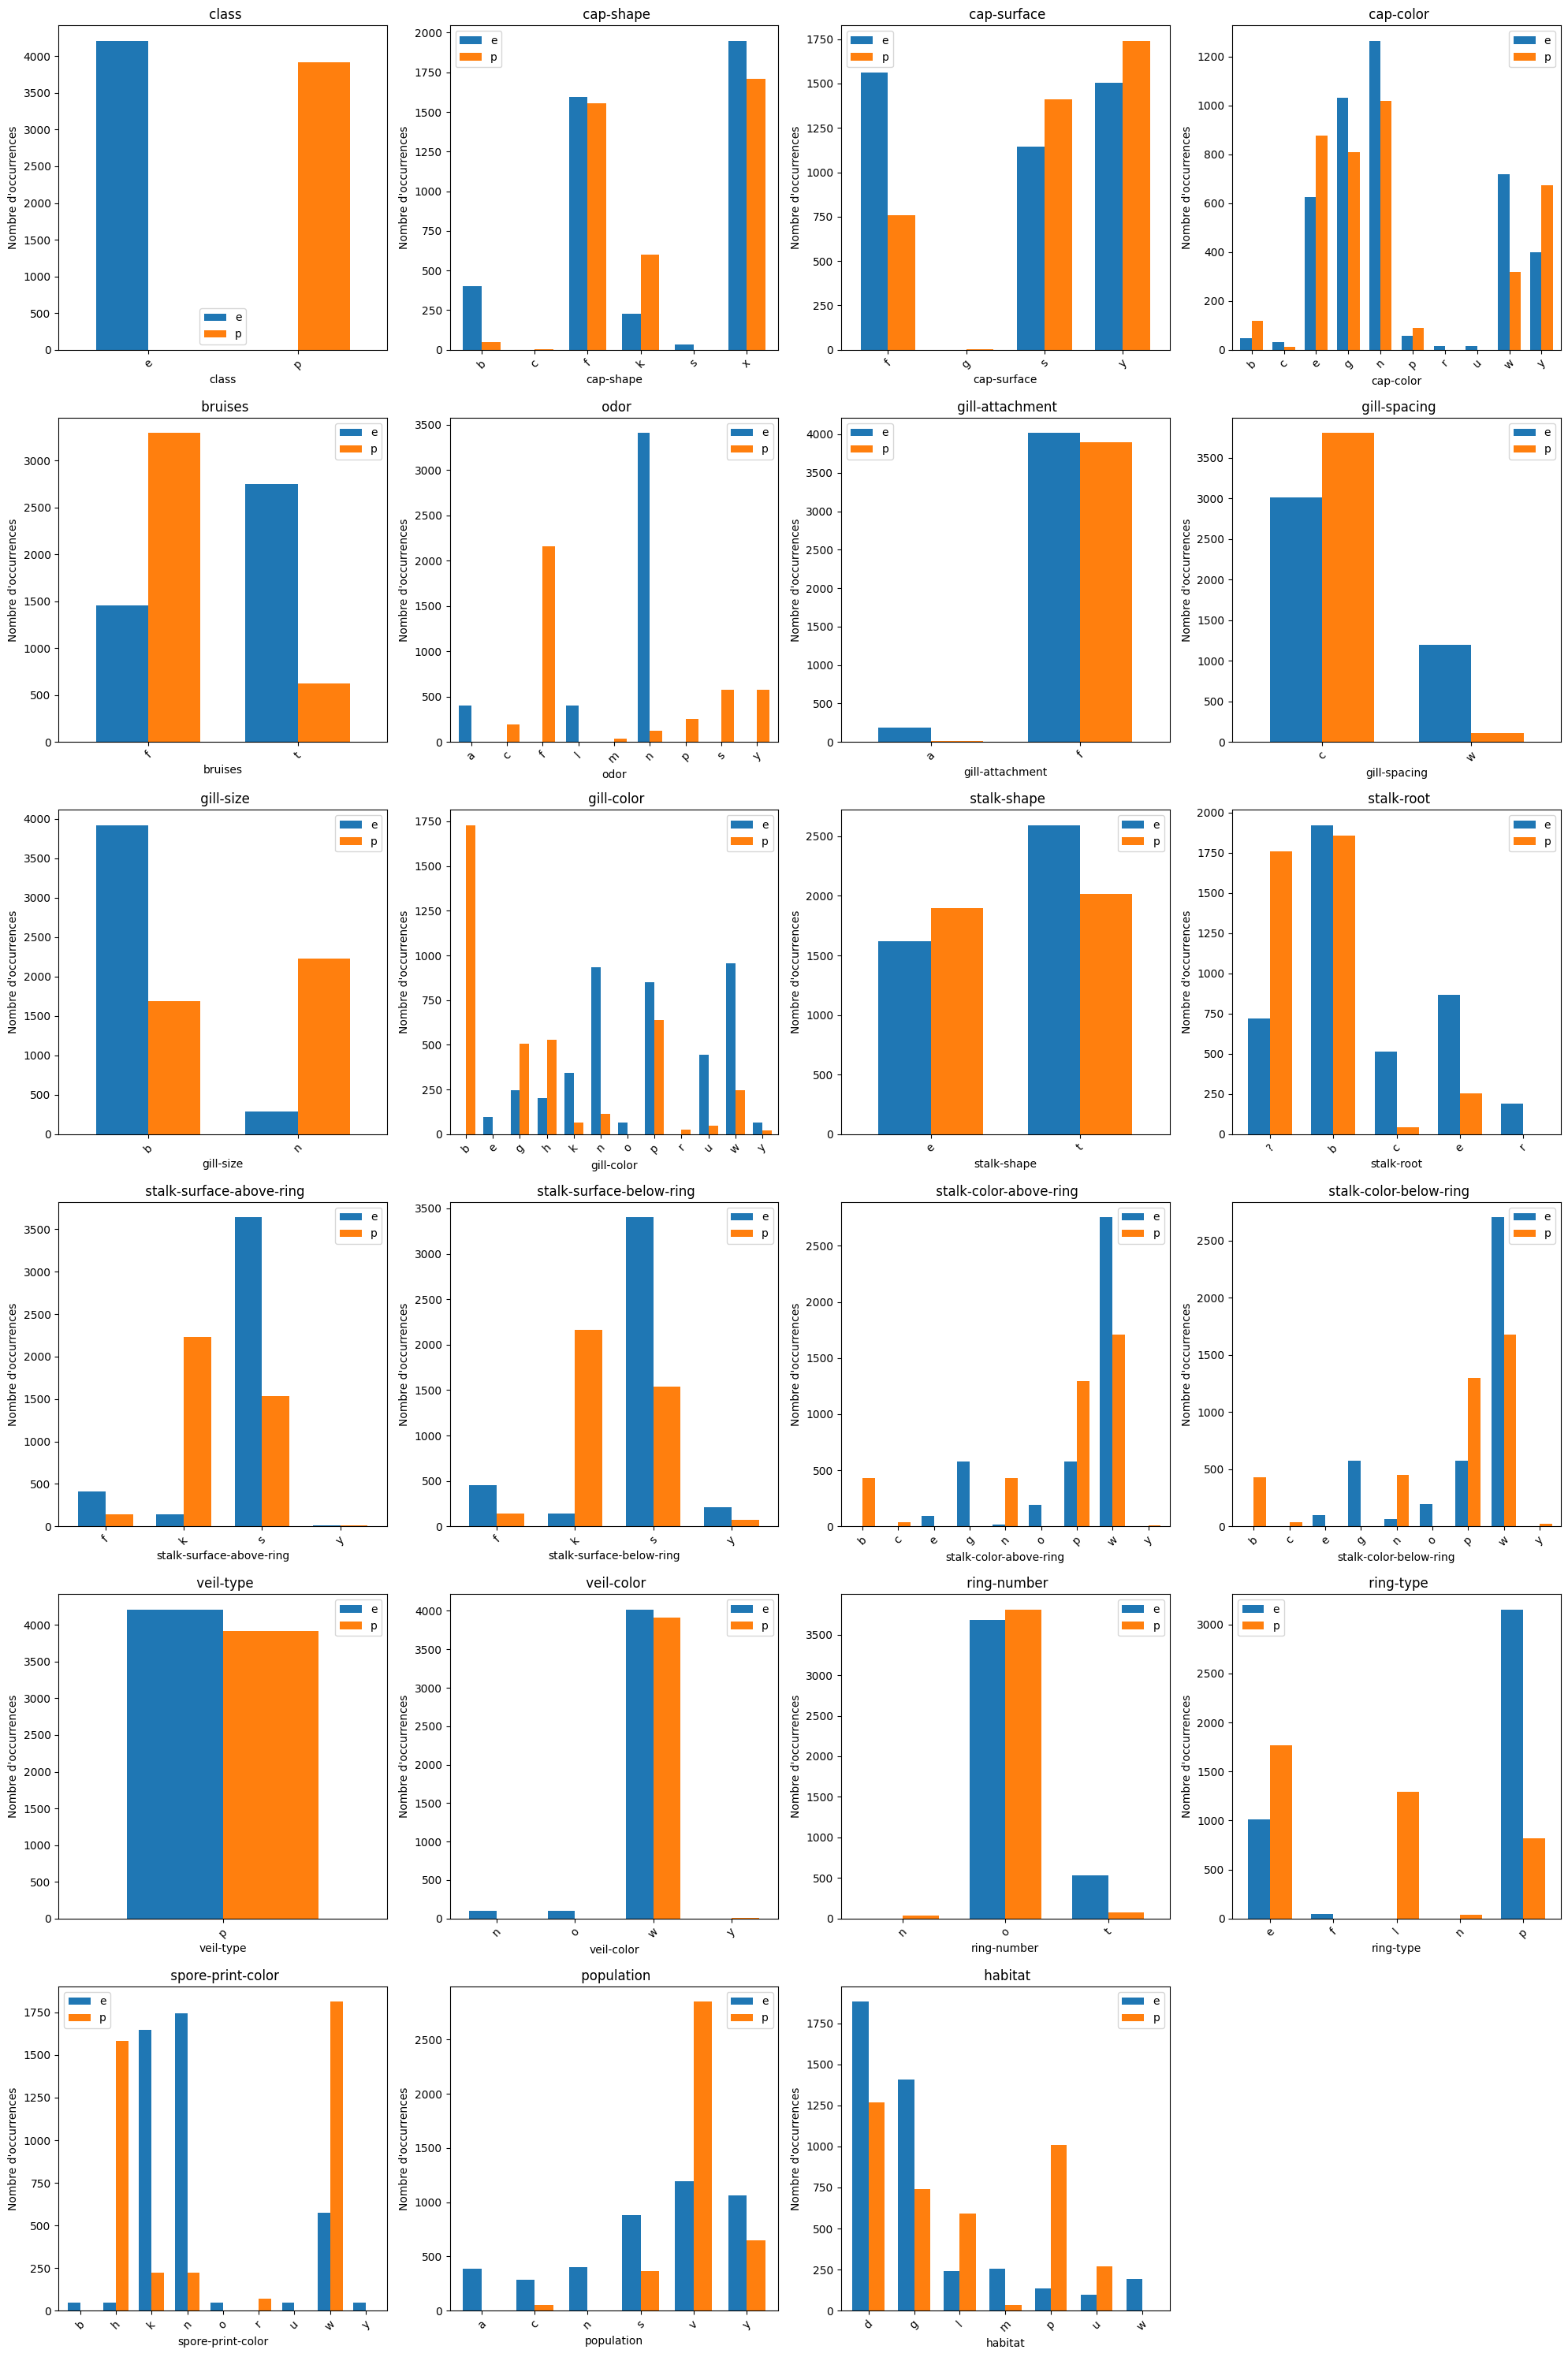

In [5]:
# Charger le fichier CSV
df = pd.read_csv('mushrooms.csv')

# Sélectionner toutes les colonnes (y compris la première colonne)
df_24_col = df.iloc[:, :24]
class_col = df.iloc[:, 0]  # La première colonne contient les classes 'e' ou 'p'

# Nombre de colonnes à afficher par ligne
cols_per_row = 4

# Calculer le nombre de lignes nécessaires pour afficher tous les graphiques
n_cols = len(df_24_col.columns)
n_rows = (n_cols + cols_per_row - 1) // cols_per_row  # Arrondir vers le haut

# Créer la figure et les sous-graphes
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Aplatir pour manipuler facilement tous les sous-graphes

# Créer des graphiques pour chaque colonne (y compris la première) en séparant les occurrences par 'e' et 'p'
for i, col in enumerate(df_24_col.columns):
    # Créer un tableau croisé dynamique pour compter les occurrences de 'e' et 'p' par valeur
    cross_tab = pd.crosstab(df[col], class_col)

    # Tracer le graphique en bâton pour chaque colonne avec deux barres par valeur (e et p)
    cross_tab.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'], width=0.7)
    axes[i].set_title(f" {col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("Nombre d'occurrences")
    axes[i].legend(labels=['e', 'p'])  # Ajouter une légende pour 'e' et 'p'
    axes[i].tick_params(axis='x', rotation=45)  # Rotation des labels de l'axe x pour meilleure lisibilité

# Supprimer les sous-graphes inutilisés si le nombre de graphiques n'est pas un multiple de 4
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster automatiquement la disposition pour éviter que les labels se chevauchent
plt.show()


## Création de la Matrice de Confusion, de la Matrice de Corrélation Linéaire, et du Réseau de Neurones

/tmp/ipykernel_1861143/612389266.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace(mapping)


Epoch 1/50


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8808 - loss: 0.3209 - val_accuracy: 0.9869 - val_loss: 0.0496
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9954 - loss: 0.0324 - val_accuracy: 0.9977 - val_loss: 0.0168
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 7.6748e-04 - val_accuracy: 1.0000 - val_loss: 9.0220e-04
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 5.9810e-04 - val_accuracy: 1

<Figure size 800x600 with 0 Axes>

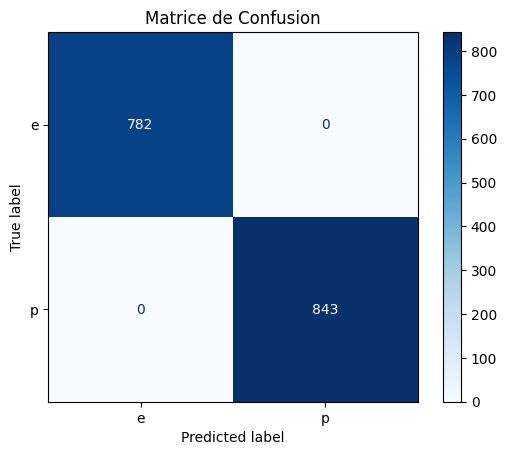

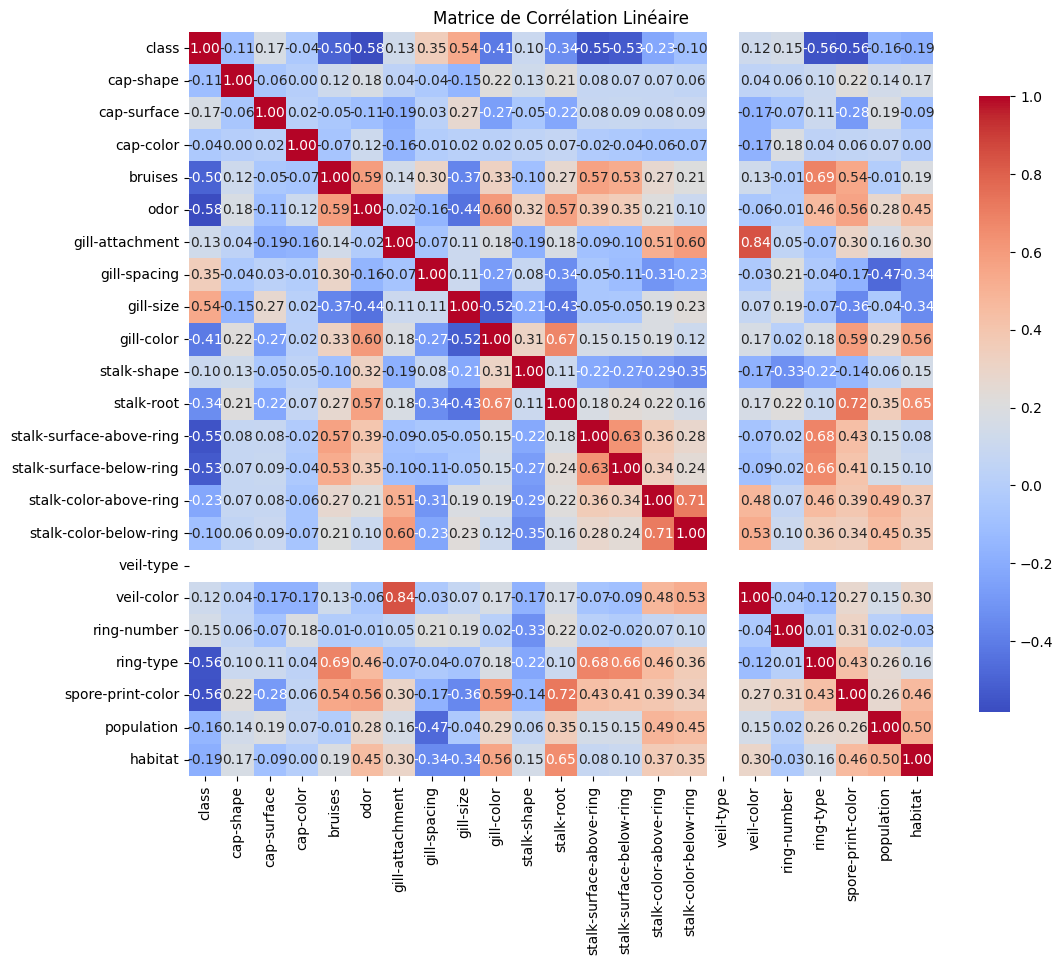

In [6]:
# Charger le fichier CSV
df = pd.read_csv('mushrooms.csv')

# Fonction pour remplacer les valeurs par des numéros uniques
def encode_column(column):
    unique_values = column.unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    return column.replace(mapping)

# Appliquer la fonction à chaque colonne du DataFrame
for col in df.columns:
    df[col] = encode_column(df[col])

# Séparer les caractéristiques (X) et la classe cible (y)
X = df.iloc[:, 1:]  # toutes les colonnes sauf la première
y = df.iloc[:, 0]   # la première colonne

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer le modèle de réseau de neurones
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')  # Deux classes pour la sortie
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['e', 'p'])
disp.plot(cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()

# Calculer et afficher la matrice de corrélation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation Linéaire')
plt.show()
